In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [3]:
X_train = pd.read_csv("data/x-train.csv")
y_train = pd.read_csv("data/y-train.csv")

X_test = pd.read_csv("data/x-test.csv")
y_test = pd.read_csv("data/y-test.csv")

In [14]:
#AdaBoost
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=200)
abc_results = abc.fit(X_train, y_train)
abc_y_pred = abc.predict(X_test)

/Users/lee/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
print("------"*10)
print(classification_report(y_test, abc_y_pred))
print("------"*10)

# F1-score on test set
print("F1-score:", f1_score(y_test, abc_y_pred, average='binary'))
print("------"*10)


------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.54      0.83      0.65        36

    accuracy                           1.00     19133
   macro avg       0.77      0.92      0.83     19133
weighted avg       1.00      1.00      1.00     19133

------------------------------------------------------------
F1-score: 0.6521739130434783
------------------------------------------------------------


In [31]:
abc_y_pred
type(y_test)
y_test.squeeze()

0        0
1        0
2        0
3        0
4        0
        ..
19128    0
19129    0
19130    0
19131    0
19132    0
Name: FraudResult, Length: 19133, dtype: int64

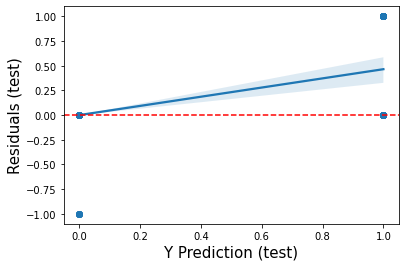

In [32]:
#residuum plot
p2=sns.regplot(x=abc_y_pred, y=(abc_y_pred-y_test.squeeze()))
p2.set_xlabel("Y Prediction (test)", fontsize = 15)
p2.set_ylabel("Residuals (test)", fontsize = 15)
p2.axhline(0, ls='--', color ="red")